In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
# from vietocr.tool.predictor import Predictor
# from vietocr.tool.config import Cfg
# from PIL import Image

# config = Cfg.load_config_from_name('vgg_transformer')
# config['device'] = 'cuda'  # đổi thành 'cuda' nếu có GPU

3.0 2.9496064
217.0 1.3439035
205.0 1.3439035
651.0 1.3439035
1.0 2.9496064
653.0 1.3264502
659.0 1.3264502
202.0 1.3439035
-22.0 2.9496064
605.0 0.7853982
607.0 0.7853982
673.0 1.3613569
686.0 1.3439035
-7.0 2.9670596
619.0 0.7853982
195.0 1.3613569
667.0 1.3089969
685.0 1.3264502
675.0 1.3613569
598.0 0.7853982
622.0 0.7853982
593.0 0.7853982
675.0 1.2391838
684.0 1.3439035
666.0 1.37881
610.0 0.7853982
664.0 1.3089969
660.0 1.2740903
687.0 1.3264502
656.0 1.3089969
718.0 1.3264502
634.0 0.7853982
682.0 1.3439035
677.0 1.3613569


(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

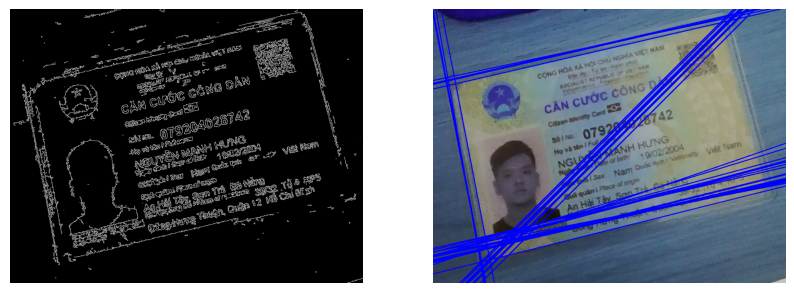

In [164]:
img = cv2.imread(r"temp\temp17.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_canny = cv2.Canny(img_gray, 50, 200)
lines = cv2.HoughLines(img_canny, 1, np.pi/180, 180)
test = img.copy()
for line in lines:
    rho, theta = line[0]
    print(rho, theta)

    # Tính toán theo công thức: ρ = x·cosθ + y·sinθ
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    # Tọa độ 2 điểm xa nhau (để kéo dài line)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Vẽ line lên ảnh gốc
    cv2.line(test, (x1, y1), (x2, y2), (0, 0, 255), 2)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img_canny, cmap='gray')
axs[1].imshow(test, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')

-13.000001


(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

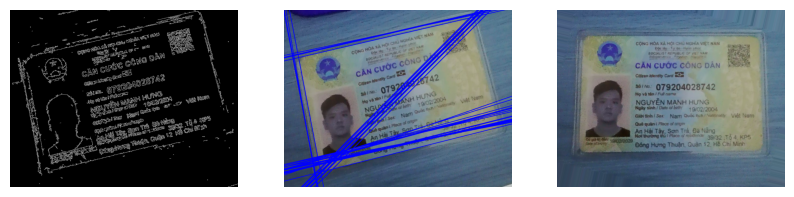

In [165]:
height, width = img.shape[:2]
center = (width//2, height//2)
horizontal_theta = 0 
min_horizontal_rad = np.deg2rad(45)
max_horizontal_rad = np.deg2rad(135)
for line in lines:
    rho, theta = line[0]

    if min_horizontal_rad < theta < max_horizontal_rad:
        horizontal_theta = theta
        break

angle_rad = horizontal_theta - (np.pi/2)
angle_deg = np.rad2deg(angle_rad)
print(angle_deg)
M = cv2.getRotationMatrix2D(center=center, angle=angle_deg, scale=1)

rotated_image = cv2.warpAffine(
    src=img.copy(), M=M, dsize=(width, height), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(img_canny, cmap='gray')
axs[1].imshow(test, cmap='gray')
axs[2].imshow(rotated_image, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

116.0 1.5707964
92.0 0.034906585
104.0 1.5707964
550.0 1.5707964
102.0 1.5707964
94.0 0.034906585
554.0 1.553343
559.0 1.553343
569.0 1.5358897
117.0 0.034906585
570.0 1.5882496
100.0 0.05235988
567.0 1.5358897
586.0 1.553343
109.0 1.553343
-883.0 3.106686
102.0 0.034906585
107.0 1.553343
561.0 1.6057029
93.0 1.5882496
96.0 1.5882496
571.0 1.5184364
455.0 1.5707964
585.0 1.5707964
124.0 1.5358897
578.0 1.5707964
582.0 1.5707964
115.0 1.553343
575.0 1.5009831
542.0 1.5707964
574.0 1.5707964
129.0 1.6057029
534.0 1.5882496
152.0 1.5707964
119.0 1.5358897
544.0 1.5707964
566.0 1.5009831
112.0 1.553343
463.0 1.5707964
526.0 1.6057029
585.0 1.4660766
575.0 1.5882496
478.0 1.5358897
511.0 1.6231562
582.0 1.4660766
569.0 1.5009831
618.0 1.553343
564.0 1.6057029
592.0 1.4486233
465.0 1.553343
213.0 1.6057029
562.0 1.5184364
563.0 1.5358897
611.0 1.5707964
558.0 1.6057029


(np.float64(-0.5), np.float64(984.5), np.float64(764.5), np.float64(-0.5))

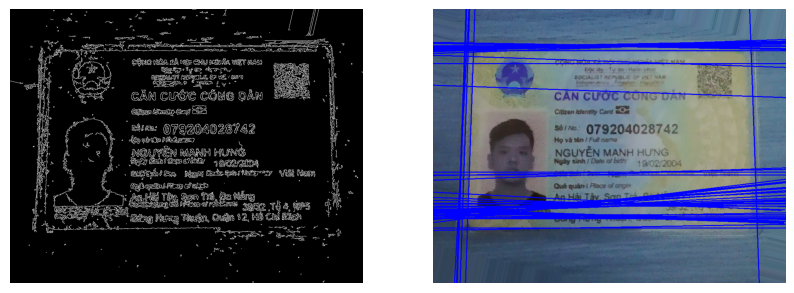

In [166]:
canny_after = cv2.Canny(rotated_image, 50, 150)
lines_after = cv2.HoughLines(canny_after, 1, np.pi/180, 180)

test_after = rotated_image.copy()
for line in lines_after:
    rho, theta = line[0]
    print(rho, theta)

    # Tính toán theo công thức: ρ = x·cosθ + y·sinθ
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    # Tọa độ 2 điểm xa nhau (để kéo dài line)
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Vẽ line lên ảnh gốc
    cv2.line(test_after, (x1, y1), (x2, y2), (0, 0, 255), 2)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(canny_after, cmap='gray')
axs[1].imshow(test_after, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')

In [167]:
def line_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([rho1, rho2])
    # Dùng lstsq để giải ổn định hơn, tránh lỗi suy biến
    x0, y0 = np.linalg.lstsq(A, b, rcond=None)[0]
    return [int(np.round(x0)), int(np.round(y0))]

In [168]:
horizontal_lines = []
vertical_lines = []

# Đặt ngưỡng góc (ví dụ: 10 độ)
angle_threshold_rad = np.deg2rad(10) # 10 độ
horizontal_target_rad = np.pi / 2    # 90 độ

for line in lines_after:
    rho, theta = line[0]
    
    # Kiểm tra đường ngang (gần 90 độ)
    if abs(theta - horizontal_target_rad) < angle_threshold_rad:
        horizontal_lines.append((rho, theta))
    
    # Kiểm tra đường dọc (gần 0 hoặc 180 độ)
    elif abs(theta) < angle_threshold_rad or abs(theta - np.pi) < angle_threshold_rad:
        vertical_lines.append((rho, theta))

if not horizontal_lines or not vertical_lines:
    print("Không tìm đủ đường ngang hoặc dọc, hãy thử điều chỉnh ngưỡng Canny hoặc HoughLines.")
else:
    # --- BƯỚC 2: Tìm 4 Đường Viền Chính ---
    
    # Sắp xếp các đường theo 'rho'
    horizontal_lines.sort(key=lambda x: x[0]) # Sắp xếp theo rho
    vertical_lines.sort(key=lambda x: x[0])   # Sắp xếp theo rho

    # Lấy min/max rho.
    # Để an toàn hơn, ta có thể lấy trung bình của 5 đường đầu/cuối
    
    # Lấy đường có rho nhỏ nhất và lớn nhất
    top_line = horizontal_lines[0]
    bottom_line = horizontal_lines[-1]
    left_line = vertical_lines[0]
    right_line = vertical_lines[-1]

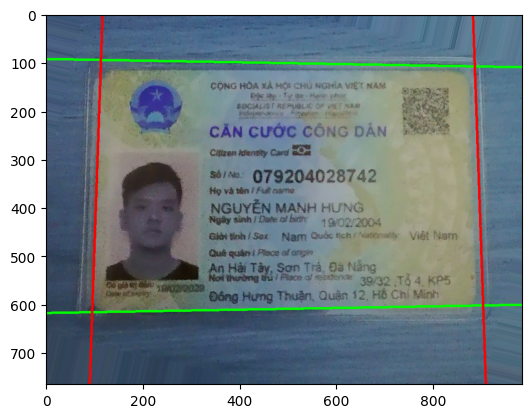

In [169]:
def draw_line(img, line, color):
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), color, 3) # Vẽ dày hơn
    
debug_lines_image = rotated_image.copy()
draw_line(debug_lines_image, top_line, (0, 255, 0))    # Xanh lá
draw_line(debug_lines_image, bottom_line, (0, 255, 0)) # Xanh lá
draw_line(debug_lines_image, left_line, (255, 0, 0))   # Xanh dương
draw_line(debug_lines_image, right_line, (255, 0, 0))  # Xanh dương

plt.imshow(debug_lines_image)